<a href="https://colab.research.google.com/github/VictorOmondi1997/visualizing_geographic_data/blob/master/visualizing_geographic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Geographic Data 

Exploring the fundamentals of geographic coordinate systems and how to work with the basemap library to plot geographic data points on maps. 

# Dataset

We'll be working with flight data from the openflights website. Here's a breakdown of the files we'll be working with and the most pertinent columns from each dataset:

* **`airlines.csv`**: data on each air line
> * `country` - where the airline is headquartered.
> * `active` - if the airline is still active.
* **`airports.csv`**: data on each airport.
> * `name` - name of the airport.
> * `city` - city the airport is located.
> * `country` - country the airport is located.
> * `code` - unique airport code.
> * `latitude` - latitude value.
> * `longitude` - longitude value.
* **`routes.csv`**: data on each flight route.
> * `airline` - airline for the route.
> * `source` - starting city for the route.
> * `dest` - destination city for the route.

# Questions

1. For each airport, which destination airport is the most common?
2. Which cities are the most important hubs for airports and airlines?

In [0]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 31 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (146 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144439 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1b

In [0]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.basemap import Basemap

plt.style.use('ggplot')

In [7]:
airlines = pd.read_csv('https://dsserver-prod-resources-1.s3.amazonaws.com/150/airlines.csv?versionId=oP_6DiU8fAtRvl5qUAVooP5ucjnnypq2')
airlines.head()

,id,name,alias,iata,icao,callsign,country,active
0,1,Private flight,\N,-,NaN,NaN,NaN,Y
1,2,135 Airways,\N,NaN,GNL,GENERAL,United States,N
2,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
3,4,2 Sqn No 1 Elementary Flying Training School,\N,NaN,WYT,NaN,United Kingdom,N
4,5,213 Flight Unit,\N,NaN,TFU,NaN,Russia,N


In [8]:
airports = pd.read_csv('https://dsserver-prod-resources-1.s3.amazonaws.com/150/airports.csv?versionId=fRTayU07b0K3oxYxyvuayQxG5kW7ZL65')
airports.head()

,id,name,city,country,code,icao,latitude,longitude,altitude,offset,dst,timezone
0,1,Goroka,Goroka,Papua New Guinea,GKA,AYGA,-6.081689,145.391881,5282,10.0,U,Pacific/Port_Moresby
1,2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.788700,20,10.0,U,Pacific/Port_Moresby
2,3,Mount Hagen,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789,144.295861,5388,10.0,U,Pacific/Port_Moresby
3,4,Nadzab,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569828,146.726242,239,10.0,U,Pacific/Port_Moresby
4,5,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,POM,AYPY,-9.443383,147.220050,146,10.0,U,Pacific/Port_Moresby


In [9]:
routes = pd.read_csv('https://dsserver-prod-resources-1.s3.amazonaws.com/150/routes.csv?versionId=eeeVHGY0hU9L5ia4eYqGWuokWRoPXKms')
routes.head()

,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


# converting from spherical to cartesian coordinate

To display latitude and logingute values to Cartesian coordinates, they must be converted.

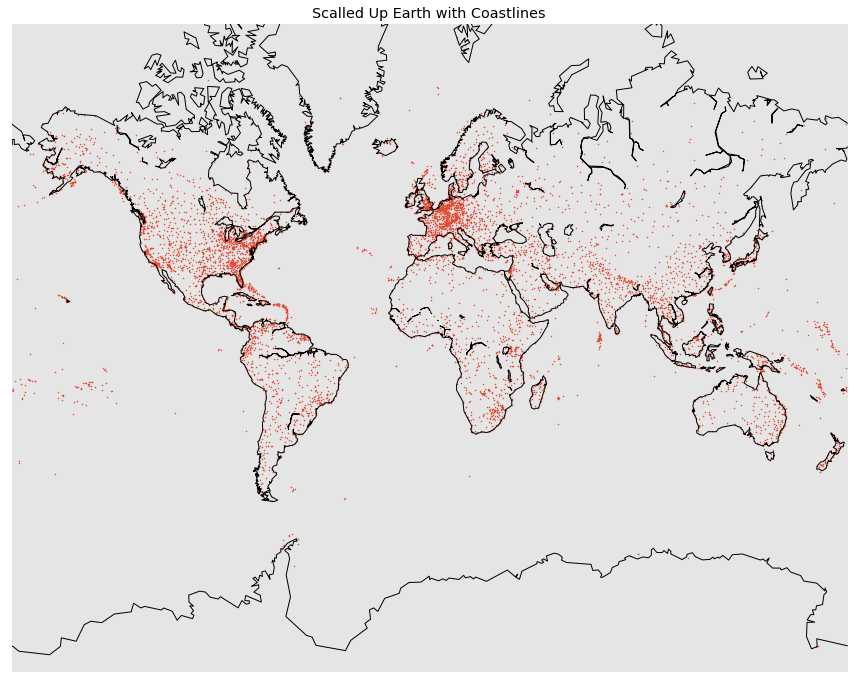

In [13]:
fig, ax = plt.subplots(figsize=(15, 20))
ax.set_title('Scalled Up Earth with Coastlines')
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
x,y=m(airports.longitude.to_list(), airports.latitude.to_list())
m.scatter(x,y, s=1)
m.drawcoastlines()
plt.show()

# Introducing the Great Circles

To better understand the flight routes, we can draw great circles to connect starting and ending locations on a map. A great circle is the shortest circle connecting 2 points on a sphere.

![](https://s3.amazonaws.com/dq-content/great_circles.png)

While the `routes` dataframe contains the source and destination airports for each route, the latitude and longitude values for each airport are in a separate dataframe (`airports`).

`geo_routes.csv` that contains the latitude and longitude values corresponding to the source and destination airports for each route. We've also removed some columns we won't be working with.

In [14]:
geo_routes = pd.read_csv('https://dsserver-prod-resources-1.s3.amazonaws.com/150/geo_routes.csv?versionId=mwYgEjZBpIdbPgMGaXiUCW0FxyE9OQY9')
geo_routes.head()

,airline,source,dest,equipment,start_lon,end_lon,start_lat,end_lat
0,2B,AER,KZN,CR2,39.956589,49.278728,43.449928,55.606186
1,2B,ASF,KZN,CR2,48.006278,49.278728,46.283333,55.606186
2,2B,ASF,MRV,CR2,48.006278,43.081889,46.283333,44.225072
3,2B,CEK,KZN,CR2,61.503333,49.278728,55.305836,55.606186
4,2B,CEK,OVB,CR2,61.503333,82.650656,55.305836,55.012622


In [15]:
geo_routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67428 entries, 0 to 67427
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   airline    67428 non-null  object 
 1   source     67428 non-null  object 
 2   dest       67428 non-null  object 
 3   equipment  67410 non-null  object 
 4   start_lon  67428 non-null  float64
 5   end_lon    67428 non-null  float64
 6   start_lat  67428 non-null  float64
 7   end_lat    67428 non-null  float64
dtypes: float64(4), object(4)
memory usage: 4.1+ MB


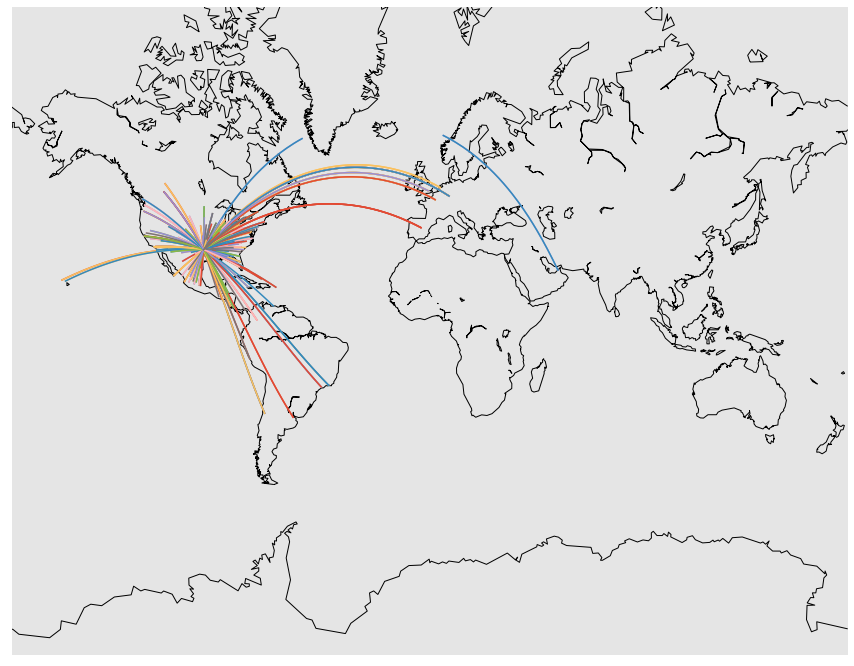

In [20]:
fig, ax = plt.subplots(figsize=(15,20))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()

def create_great_circles(dataframe):
    for i,row in dataframe.iterrows():
        start_lon=row['start_lon']
        start_lat=row['start_lat']
        end_lat=row['end_lat']
        end_lon=row['end_lon']
        if (abs(end_lat-start_lat)<180):
            if (abs(end_lon - start_lon)<180):
                m.drawgreatcircle(start_lon, start_lat, end_lon, end_lat)
dfw = geo_routes[geo_routes.source=='DFW']
create_great_circles(dfw)
plt.show()